# Clusterización de datos: categorización de países

<strong>Objetivo:</strong> Crear un proyecto de datos de países con características socio-económicas similares aplicando K-means, clustering jerárquico y DBSCAN para crear clústeres de datos.<br>
<strong>Dataset:</strong> Obtener datos del siguiente <a href='https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data'>link</a> de Kaggle.

### Importar librerías y preparar datos

In [164]:
# Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from itertools import product 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [165]:
# Cargar datos
df_country = pd.read_csv('./datasets/Country-data.csv')

In [166]:
# Ver resumen estadístico de los datos
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [167]:
# Ver valores nulos
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [168]:
# Ver duplicados
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


No hay ni valores nulos ni duplicados.

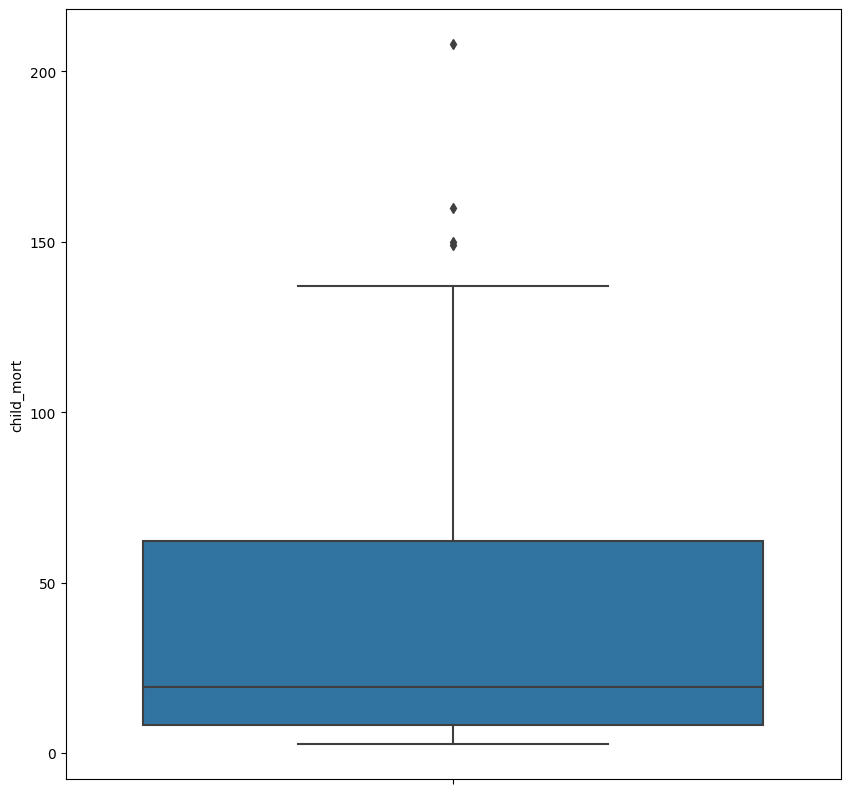

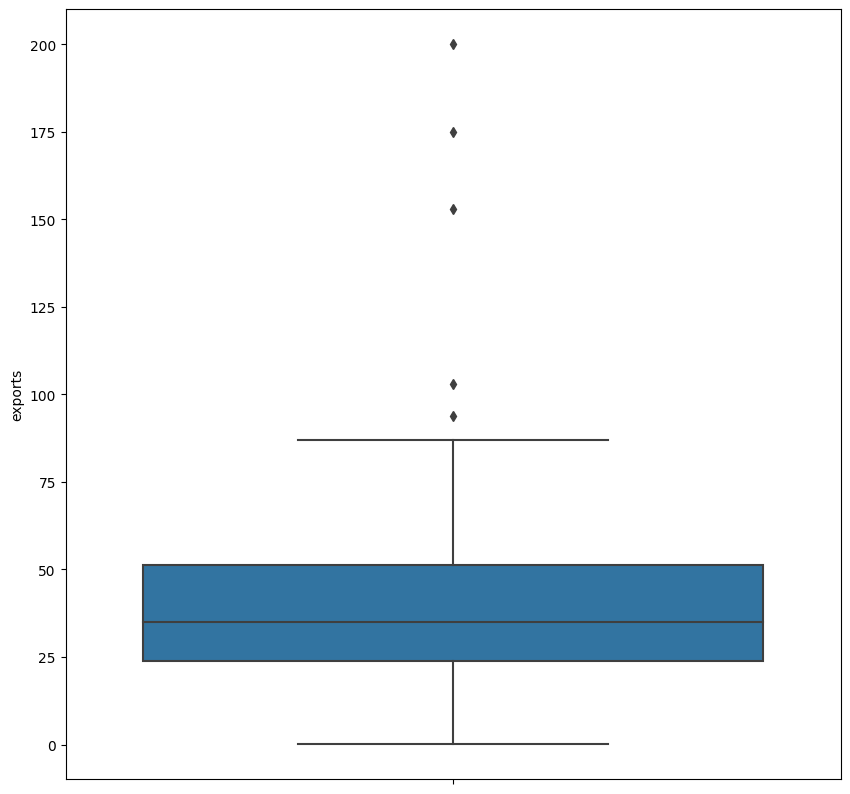

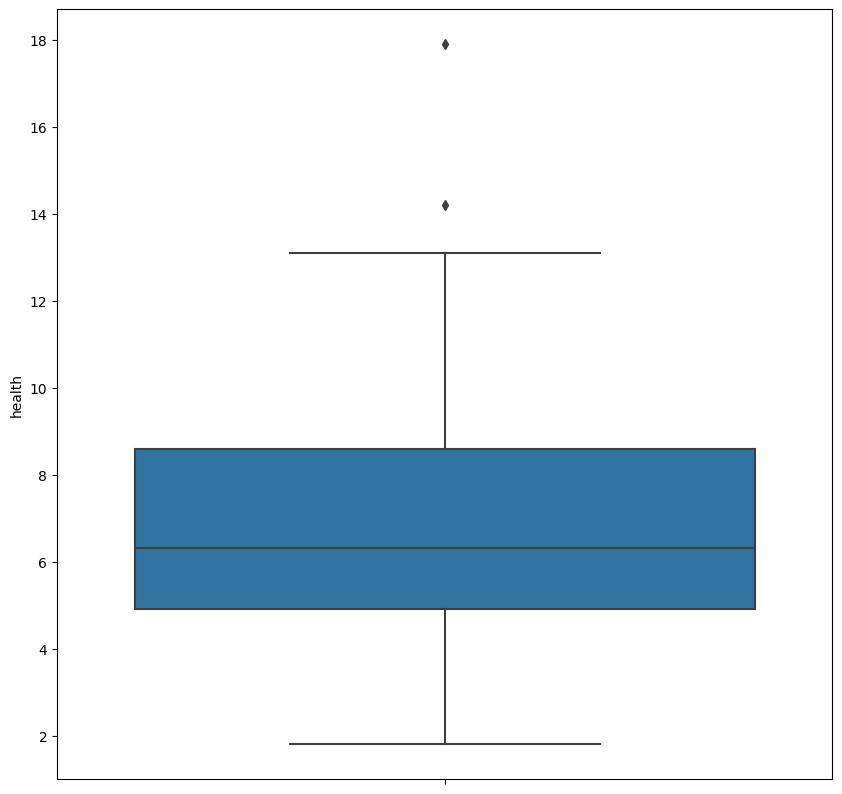

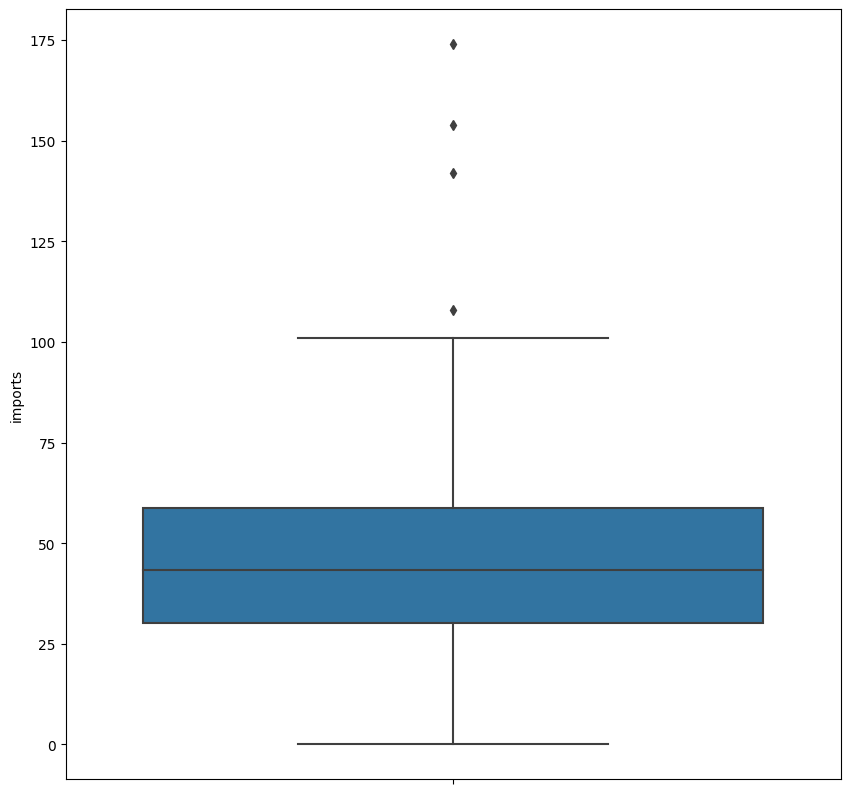

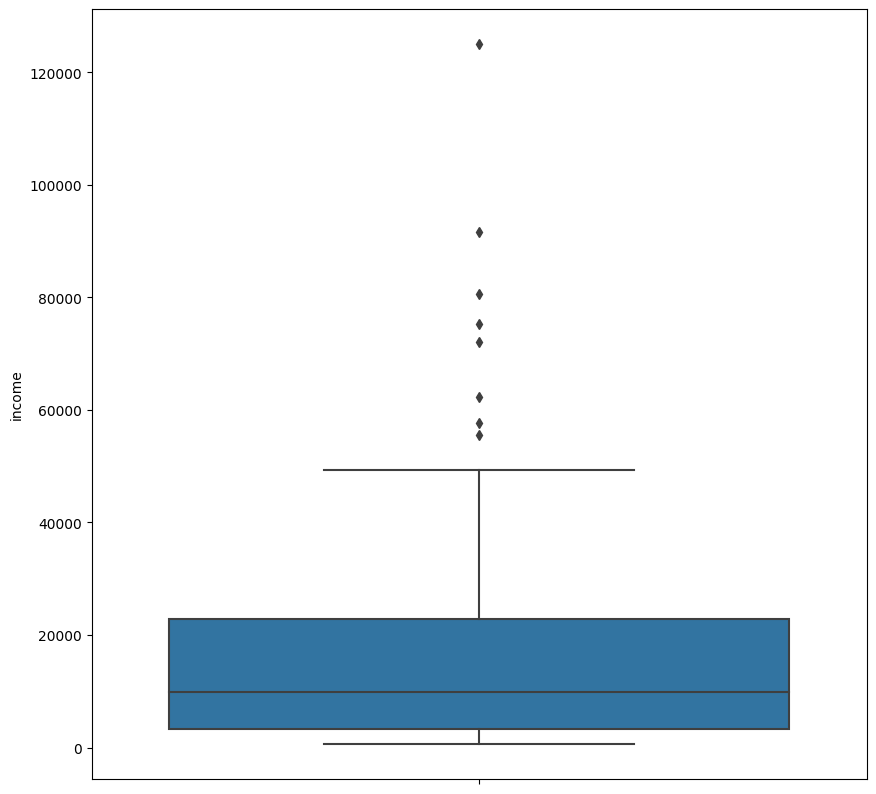

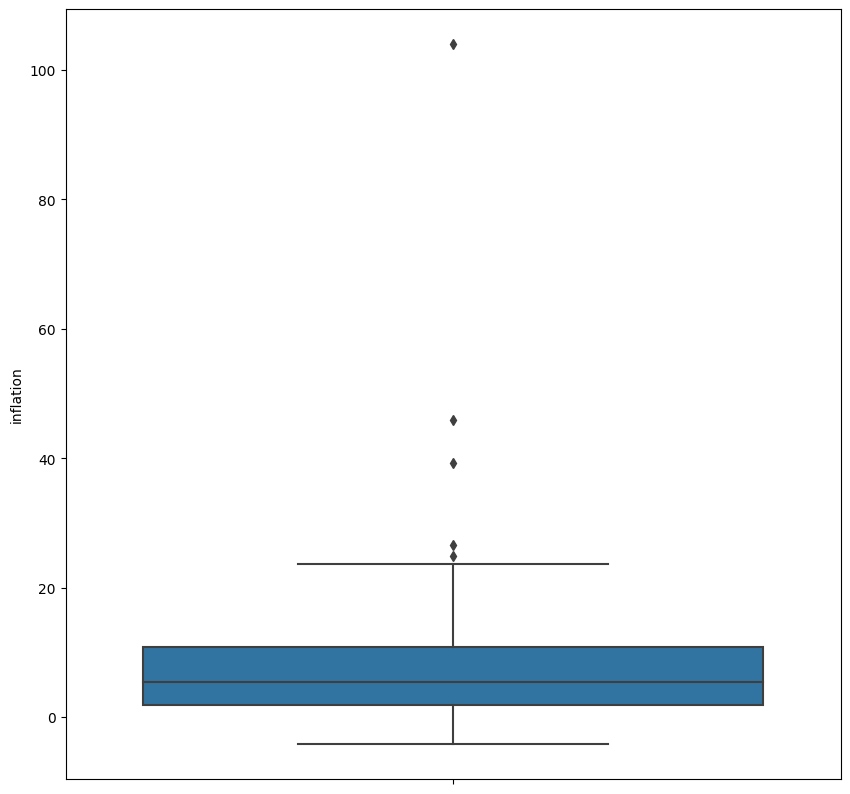

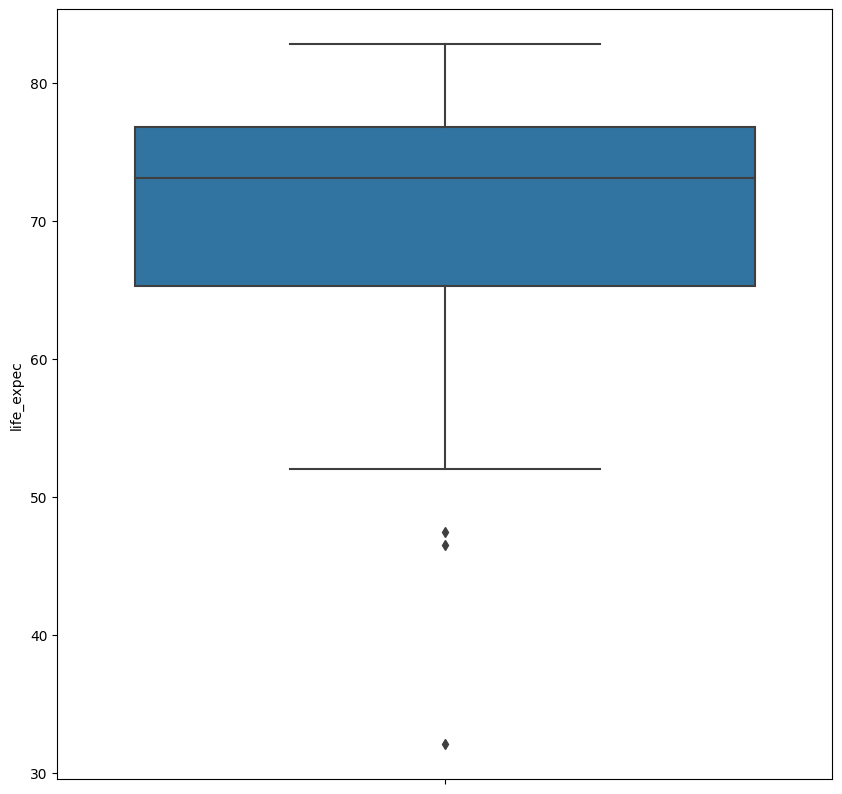

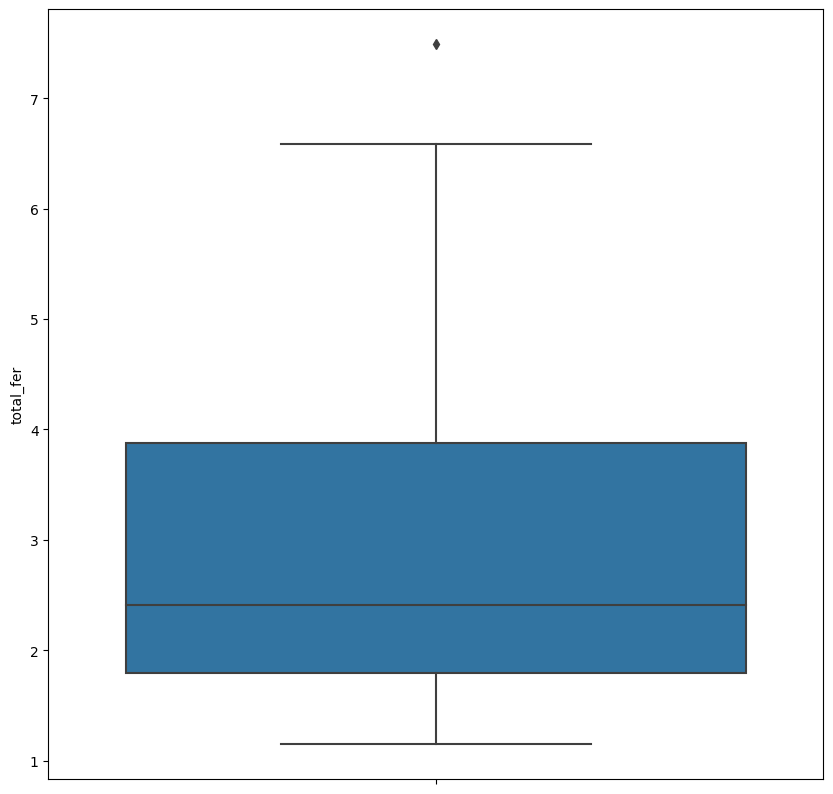

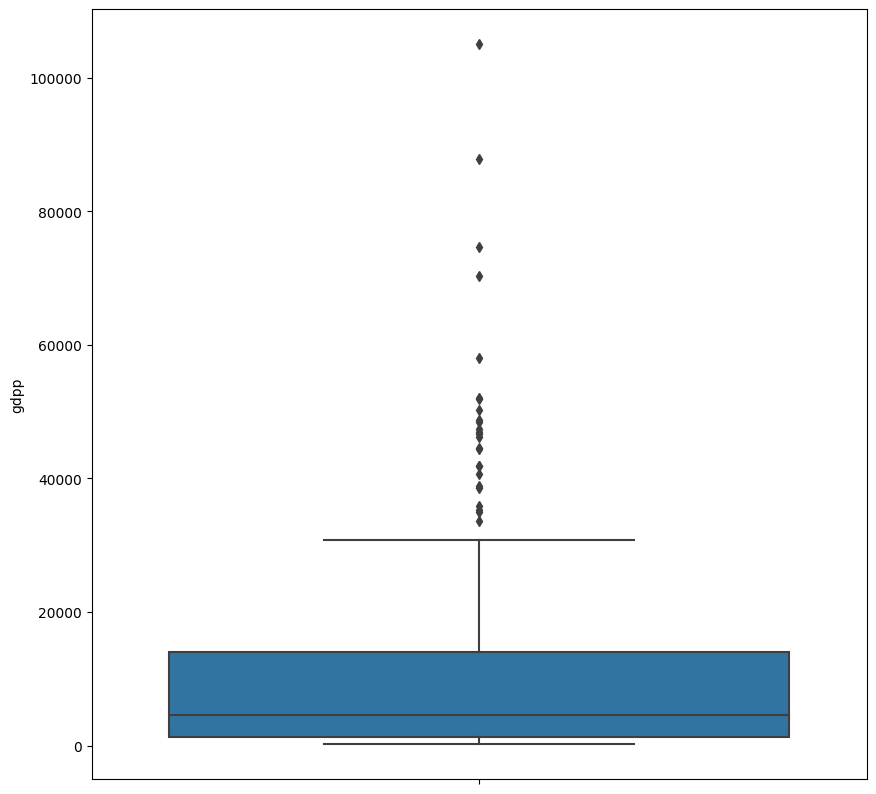

In [169]:
# Análisis de distribución
int_cols = df_country.select_dtypes(exclude='object').columns 
for _ in int_cols:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=df_country, y= _)
    plt.show()

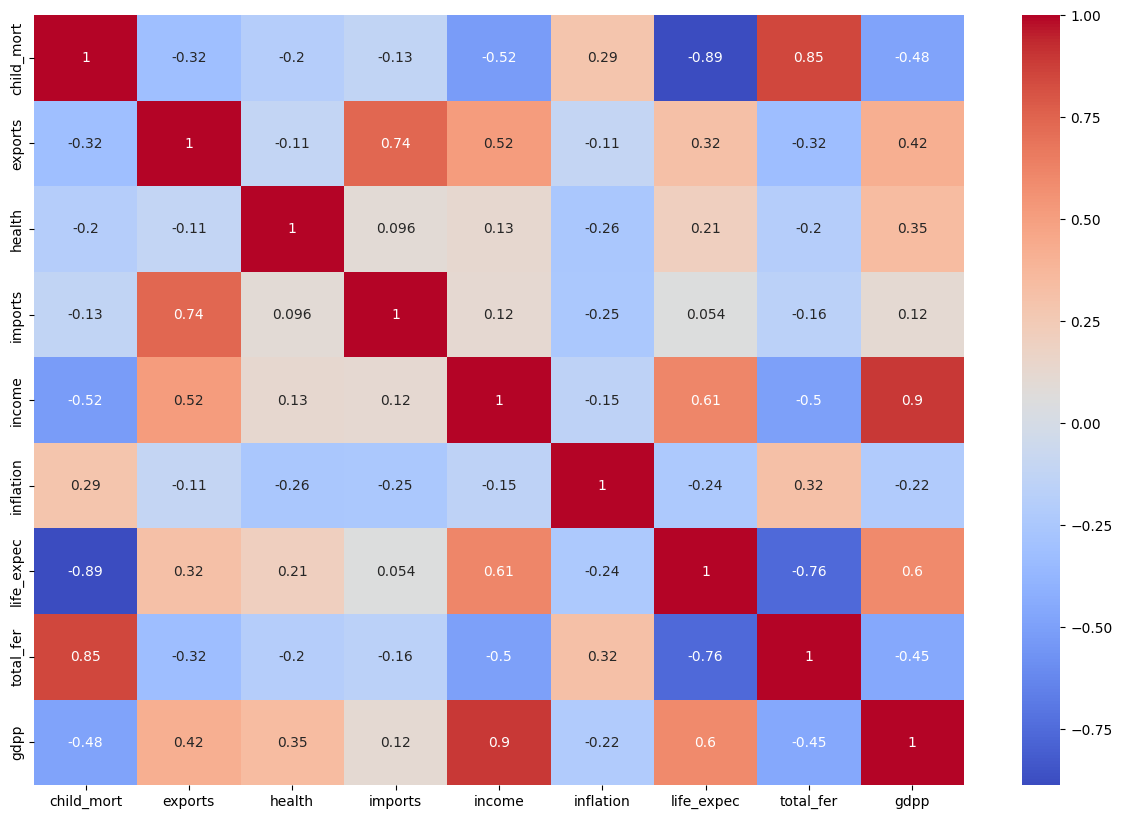

In [170]:
# Correlación entre variables
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

In [171]:
# Escalar datos
scaaler = StandardScaler()
df_country_scaled = scaaler.fit_transform(df_country.drop('country', axis=1))

In [172]:
# Crear dataframe con los datos escalados
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country',axis=1).columns)
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


Reducir dimensionalidad con PCA:

In [173]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [174]:
# La siguiente función devuelve un arreglo de números que indican el porcentaje de la varianza explicada por cada uno de los componentes principales obtenidos.
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


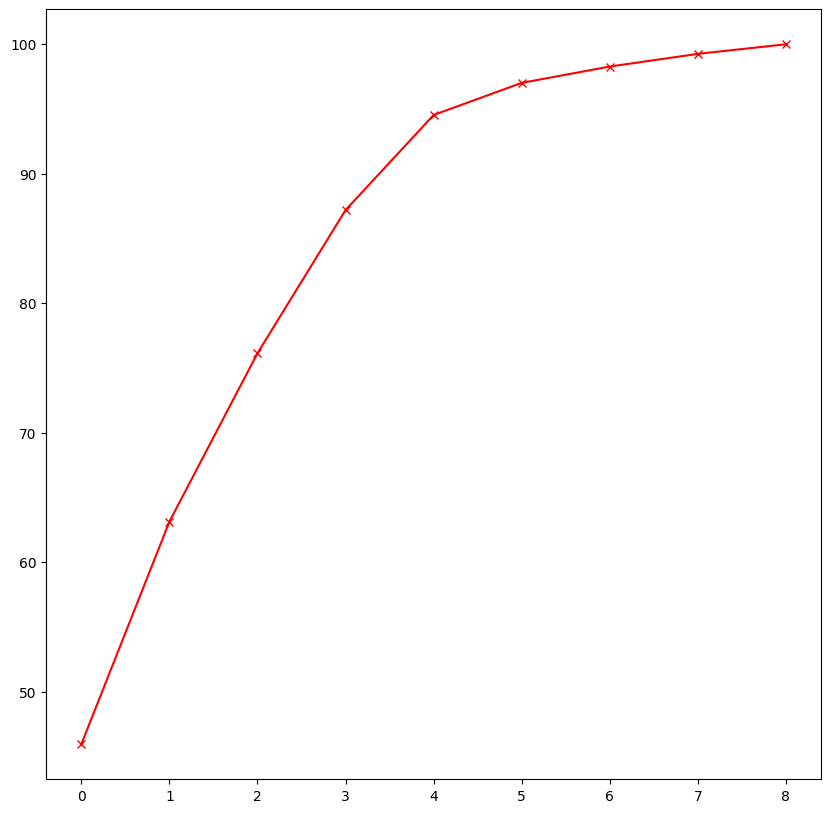

In [175]:
# Graficar la suma acumulada de la varianza
cum_var = np.cumsum(np.round(var, decimals=4)*100) 
plt.figure(figsize=(10, 10))
plt.plot(cum_var, 'r-x')
plt.show()

In [176]:
# Crear un nuevo dataframe a partir de los datos de PCA escalados.
# Luego, eliminar las columnas 4, 5, 6, 7 y 8 del dataframe y mostrar los primeros 5 registros
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### Resolver con K-means

Con PCA:

In [177]:
'''
El siguiente código realiza un análisis de clusterización k-means en el dataset "pca_data_standard" y calcula el coeficiente de silueta y la suma de las distancias al cuadrado de cada punto a su centroide más cercano para cada valor de k en el rango de 2 a 15.
Al final del bucle, se almacenan los valores de la suma de las distancias al cuadrado y el coeficiente de silueta en las listas "Sum_of_squared_distances" y "silhouette_scores".
'''
Sum_of_squared_distances = [] # Métrica utilizada para evaluar el rendimiento del agrupamiento
silhouette_scores = [] # Métrica utilizada para evaluar la calidad del agrupamiento.
K = range(2, 15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y))

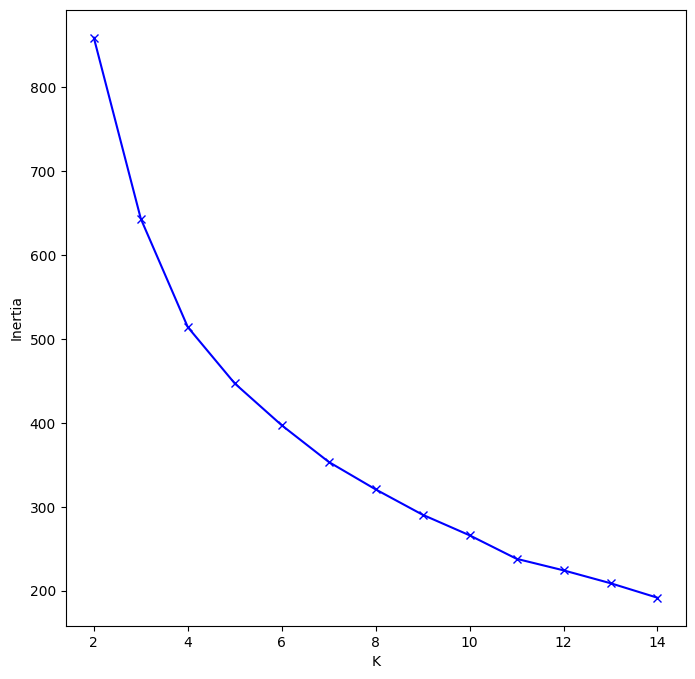

In [178]:
# Graficar
fig = plt.figure(figsize=(8, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

El codo se encuentra entre el 4 y el 5. Gráficar coeficiente de silueta para validar:

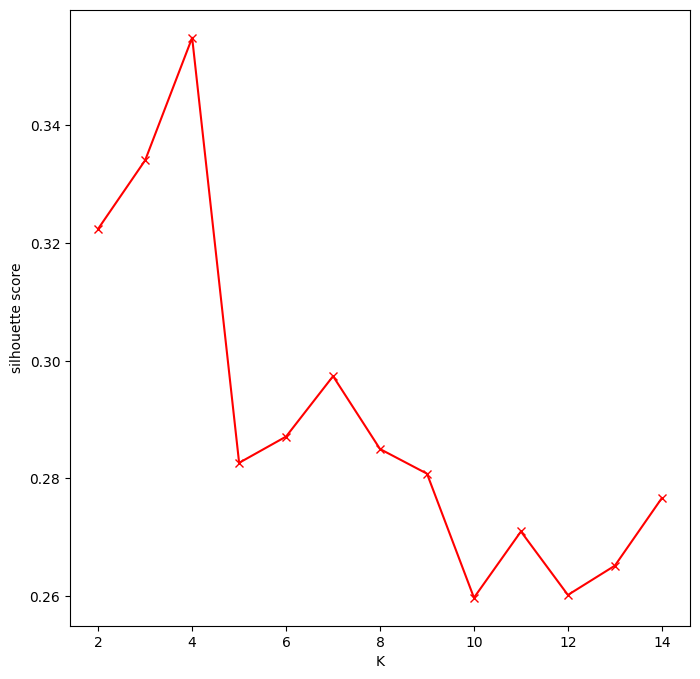

In [179]:
fig = plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [180]:
# Crear una instancia del algoritmo K-Means con 4 clusters,
# ajustar el modelo K-Means a los datos utilizando el método "fit_predict" y asignar el resultado a la variable "y".
# Luego, utilizar la función silhouette_score para calcular el coeficiente de silueta de los clusters formados.
# Finalmente, crear una nueva columna en el dataframe llamada "k_means_pca" y asignar el resultado de la agrupación (la variable "y").
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.35221708432935916


Sin PCA:

In [181]:
# K-means
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 5) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled, y))

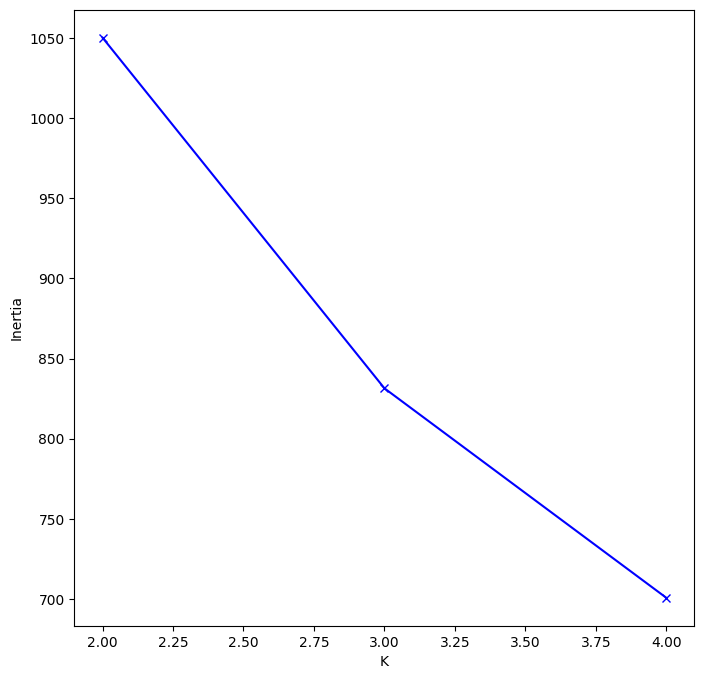

In [182]:
# Gráfico de líneas
# Este gráfico muestra la inercia de los datos para diferentes valores K, lo cual resulta útil para determinar el valor óptimo para K.
fig = plt.figure(figsize=(8, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

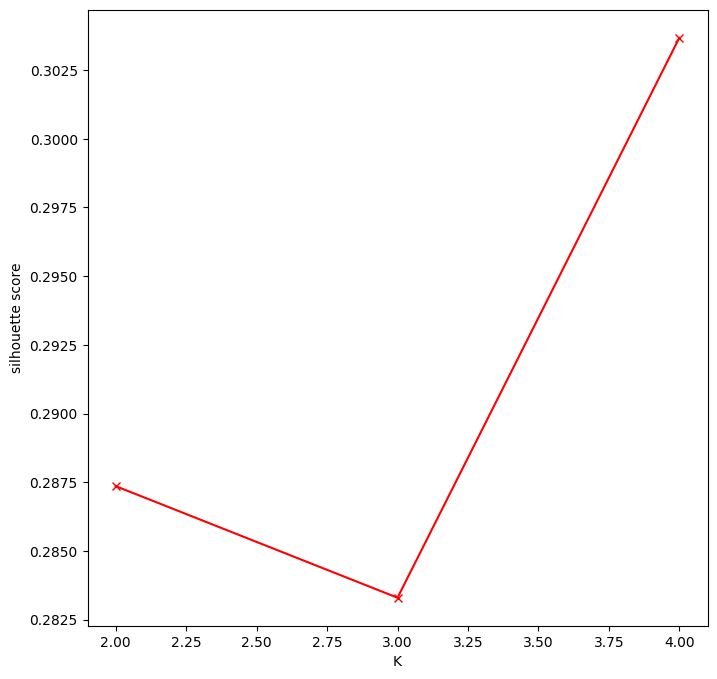

In [183]:
# Graficar línea que muestra el score de silueta para cada valor de K
fig = plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [184]:
# Crear una instancia del algoritmo K-Means con 5 clusters,
# ajustar el modelo K-Means a los datos utilizando el método "fit_predict" y asignar el resultado a la variable "y".
# Luego, utilizar la función silhouette_score para calcular el coeficiente de silueta de los clusters formados.
# Finalmente, crear una nueva columna en el dataframe llamada "k_means" y asignar el resultado de la agrupación (la variable "y").
km = KMeans(n_clusters=5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.22058240549654967


La reducción de dimensionalidad sí está ayudando al algoritmo a obtener mejores resultados.

### Resolver con hierarchical clustering aglomerativo

Con PCA:

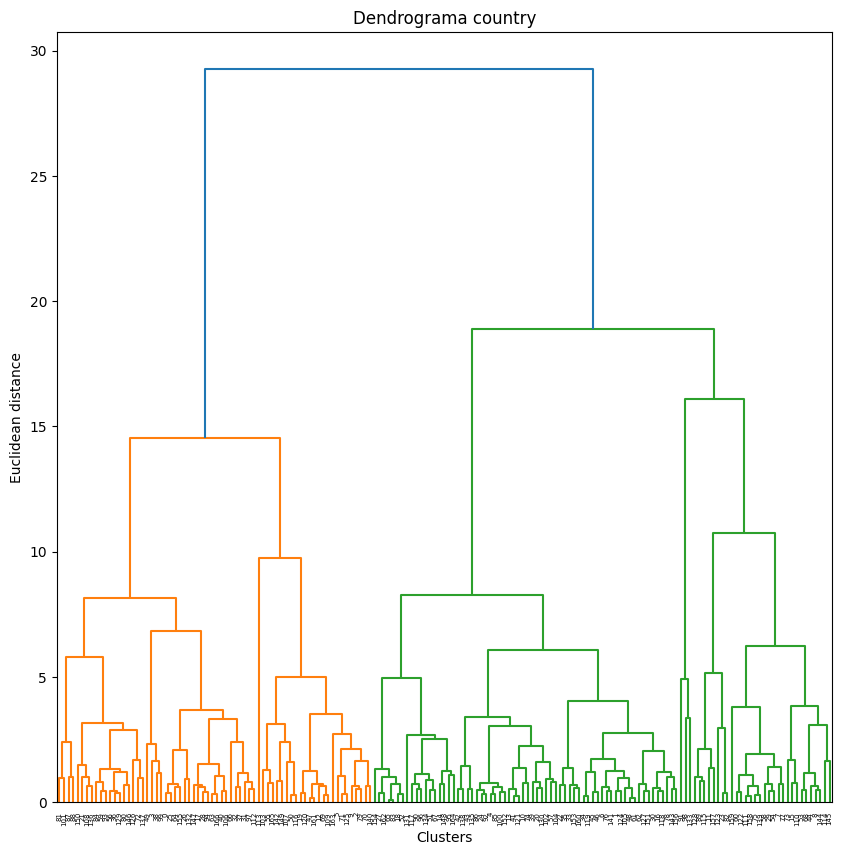

In [185]:
# Generar dendrograma a partir de los datos "pca_data_standard", utilizando el método de enlazamiento de Ward
# El dendrograma muestra la distancia euclidiana entre los clusters de datos. 
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [186]:
# Crear una instancia del algortimo de hierarchical clustering aglomerativo, 
# ajustar el modelo a los datos utilizando el método fit_predict y almacenar el resultado en la variable y_hc.
# Luego, utilizar la función silhouette_score para calcular el coeficiente de silueta de los clusters formados.
# Finalmente, crear una nueva columna en el dataframe llamada hc_pca y asignar a esta columna los valores de y_hc.
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080526


Sin PCA:

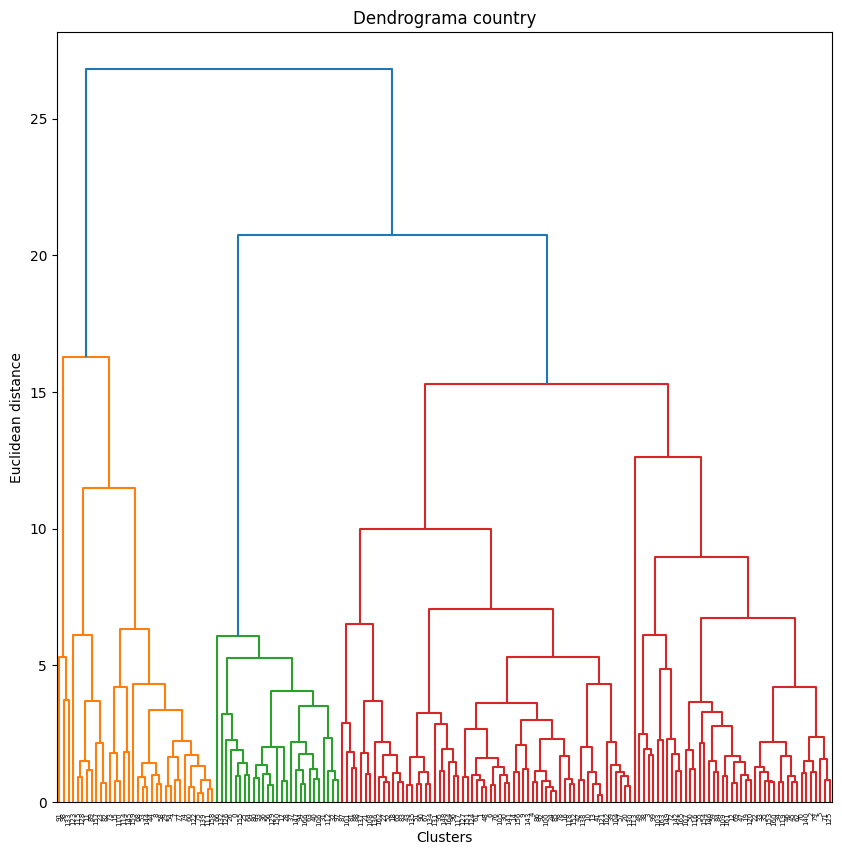

In [187]:
# Dendograma
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [188]:
# Crear una instancia del algortimo de hierarchical clustering aglomerativo, 
# ajustar el modelo a los datos utilizando el método fit_predict y almacenar el resultado en la variable y_hc.
# Luego, utilizar la función silhouette_score para calcular el coeficiente de silueta de los clusters formados.
# Finalmente, crear una nueva columna en el dataframe llamada hc y asignar a esta columna los valores de y_hc.
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc'] = y_hc

0.3153134331018189


El resultado de coeficiente de silueta obtenido sin utilizar PCA es ligeramente mejor que el resultado obtenido utilizando PCA.

### Resolver con DBSCAN

Con PCA:

In [189]:
# Crear instancia del algortimo Nearest Neighbors para encontrar los dos puntos más cercanos a cada punto de datos.
# Luego justar el modelo a los datos.
# Finalmente, utilizar el método kneighbors para encontrar los índices y distancias de los dos puntos más cercanos a cada punto de datos.
# Los índices se almacenan en la lista indices y las distancias en la lista distances.
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

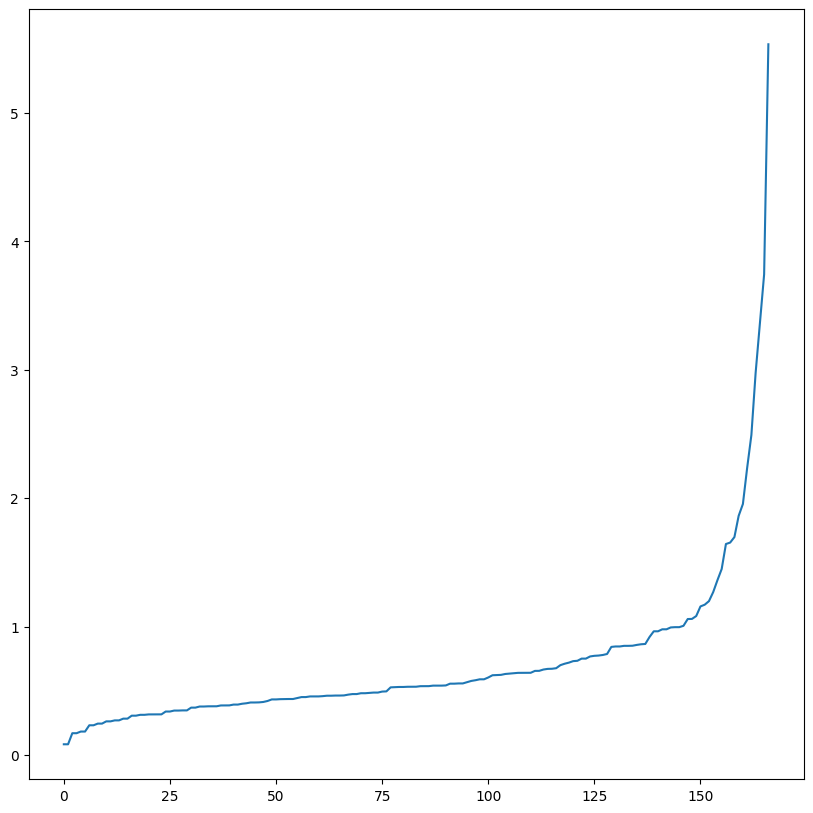

In [190]:
# Gráfico de línea que muestra cómo varía la distancia del segundo punto más cercano a cada punto de datos en el datset
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
fig = plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.show()

In [191]:
# Generar dos arreglos
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3, 12)

In [192]:
# El siguiente código realiza un análisis de clusterización de datos utilizando el algoritmo DBSCAN
# y evalúa el rendimiento del agrupamiento para diferentes valores de los parámetros de DBSCAN.
dbscan_paramns = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard, y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [193]:
# Crear un dataframe
# a partir de la información obtenida durante el análisis de clusterización de datos utilizando el algoritmo DBSCAN.
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps', 'Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [194]:
# Crear dos tablas pivoteadas a partir de df_param_tunning
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

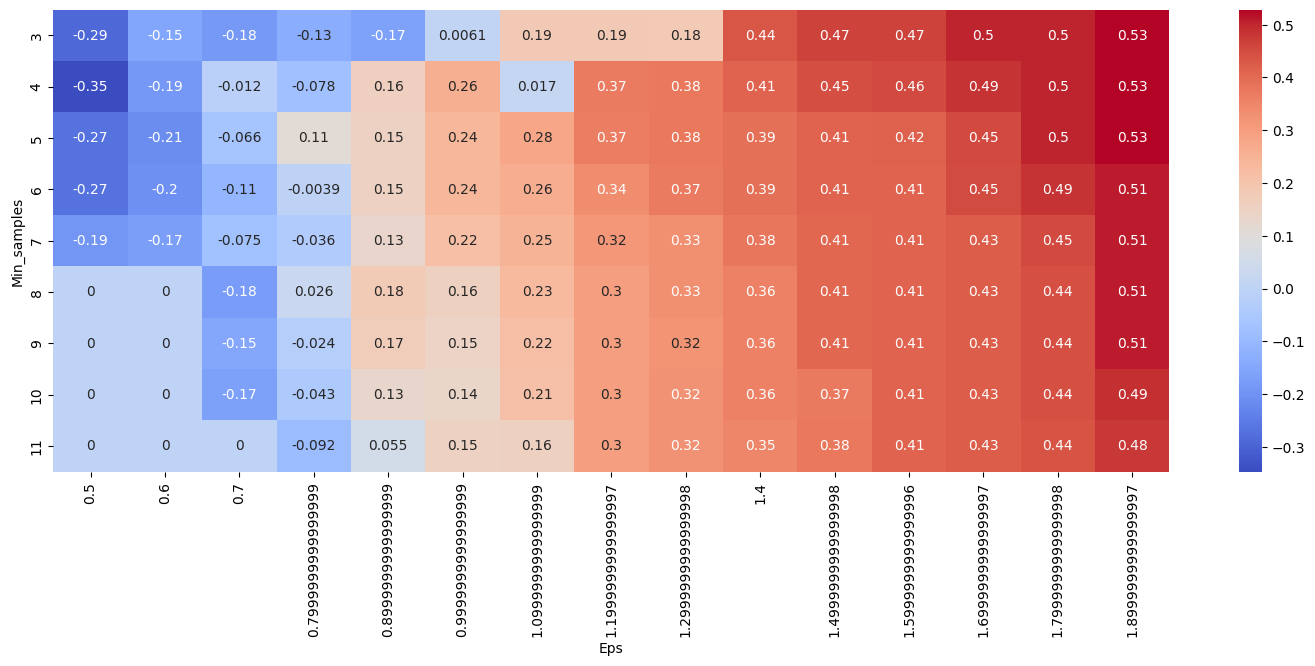

In [195]:
# Graficar heatmap sobre la primera tabla pivoteada
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

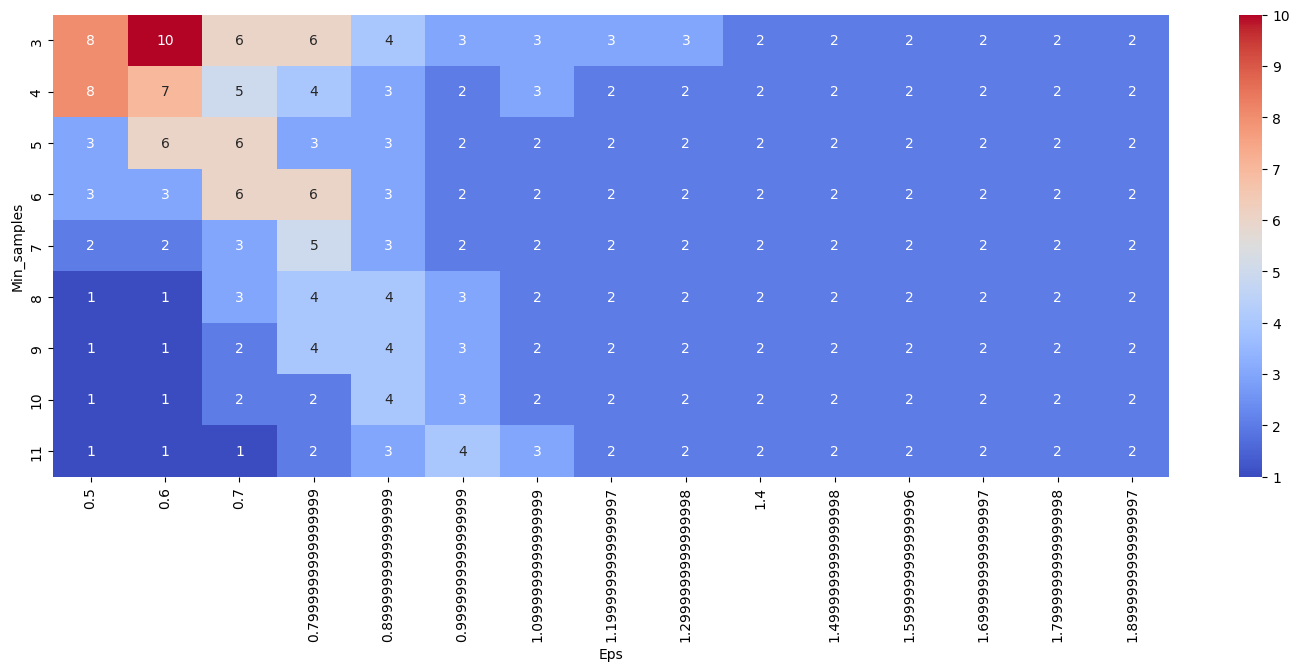

In [196]:
# Graficar heatmap sobre la segunda tabla pivoteada
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [197]:
# Crear instancia del algoritmo DBSCAN, ajustar datos al modelo, calcular el coeficiente de silueta y crear una nueva columna en el dataset para guardar los resultados de y_dbscan.
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan ))
df_country['dbscan_pca'] = y_dbscan

0.1859117573078435


Sin PCA:

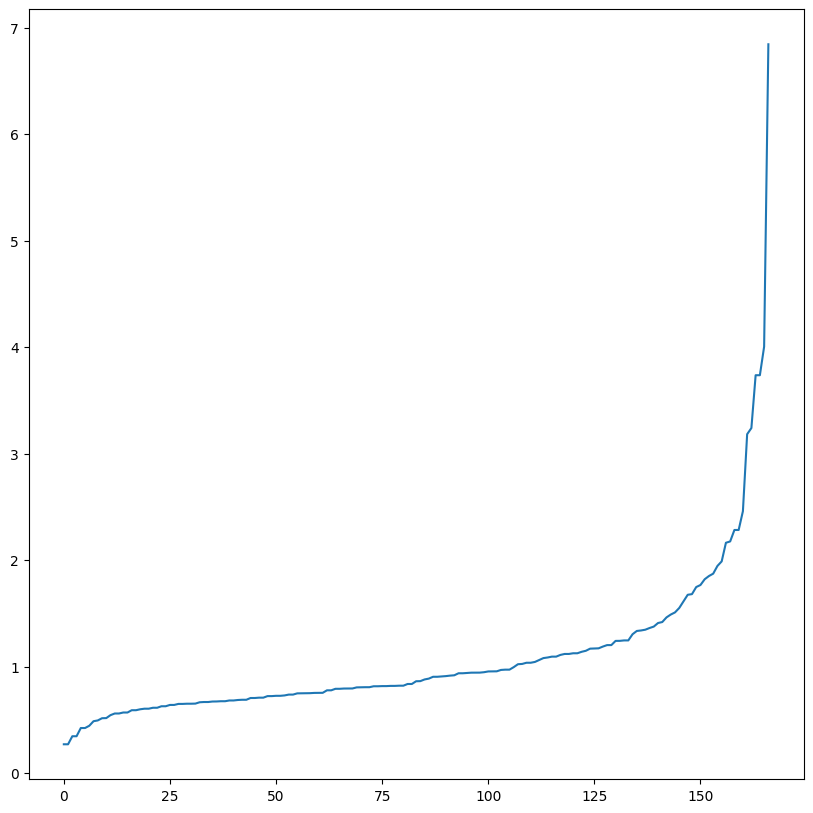

In [198]:
# Encontrar los dos vecinos más cercanos de cada punto en el dataset.
# Luego, graficar la distancia del punto a su vecino más cercano
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

fig = plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.show()

In [199]:
# Generar dos arreglos
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3, 12)

In [200]:
# El siguiente código realiza un análisis de clusterización de datos utilizando el algoritmo DBSCAN
# y evalúa el rendimiento del agrupamiento para diferentes valores de los parámetros de DBSCAN.
dbscan_paramns = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled, y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [201]:
# Crear un dataframe
# a partir de la información obtenida durante el análisis de clusterización de datos utilizando el algoritmo DBSCAN.
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps', 'Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [202]:
# Crear dos tablas pivoteadas a partir de df_param_tunning
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

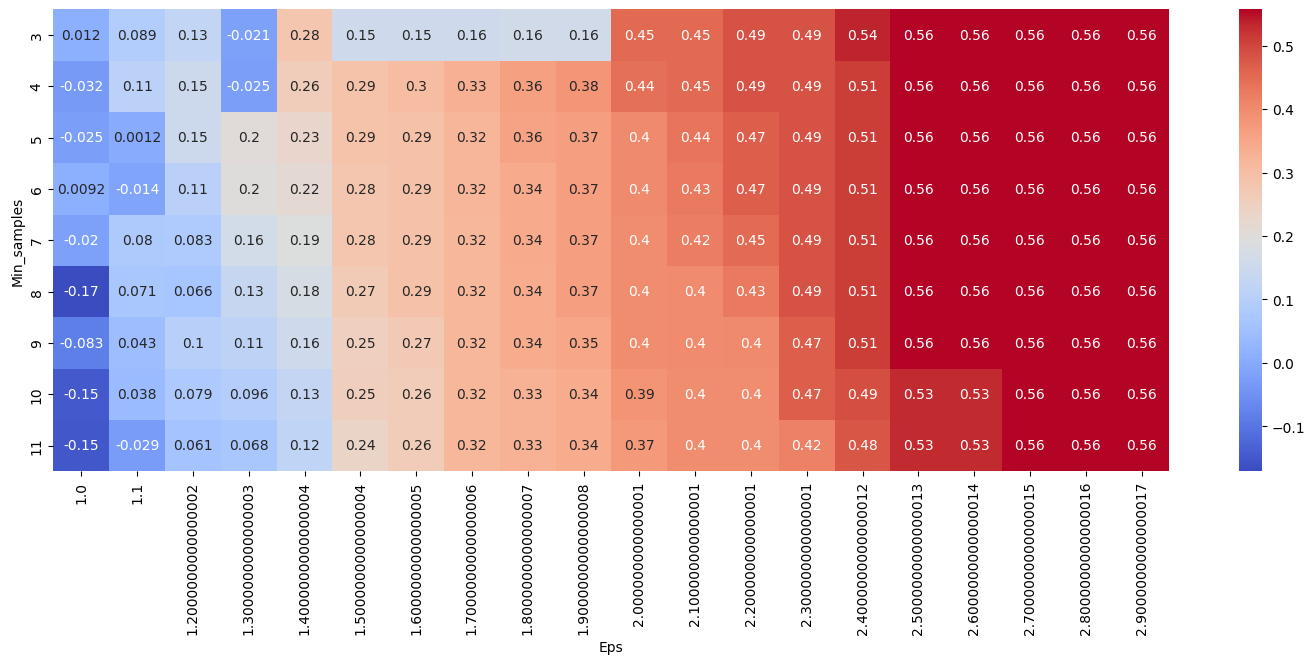

In [203]:
# Graficar heatmap sobre la primera tabla pivoteada
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

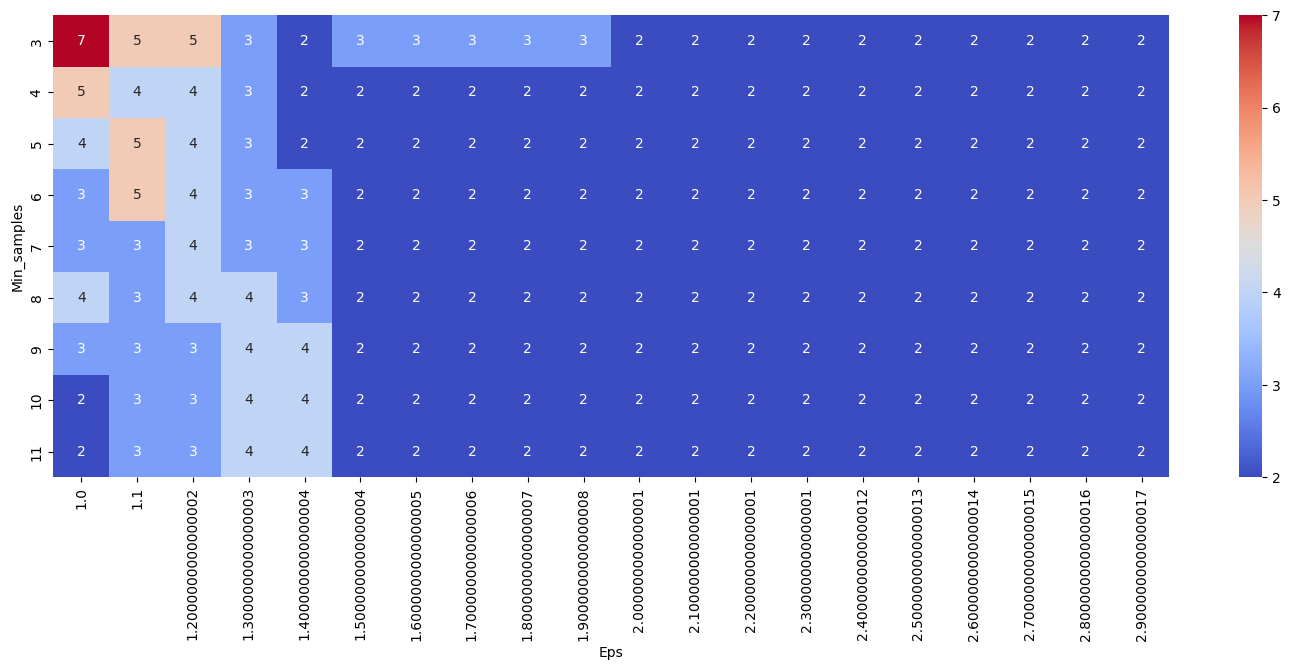

In [204]:
# Graficar heatmap sobre la segunda tabla pivoteada
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [205]:
# Crear instancia del algoritmo DBSCAN, ajustar datos al modelo, calcular el coeficiente de silueta y crear una nueva columna en el dataset para guardar los resultados de y_dbscan.
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

0.1563549566374231


Se obtuvieron mejores resultados con PCA.

In [206]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,2,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0,1,0,0,0


### Evaluar resultados

In [207]:
# Dataset con todas las clusterizaciones aplicadas
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,1,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,2,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0,1,0,0,0


Los mejores resultados fueron obtenidos con K-means PCA. Por lo tanto, analizar ese algoritmo.

In [208]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [209]:
# Seccionar dataset para ver solo las columnas de interés
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
    'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


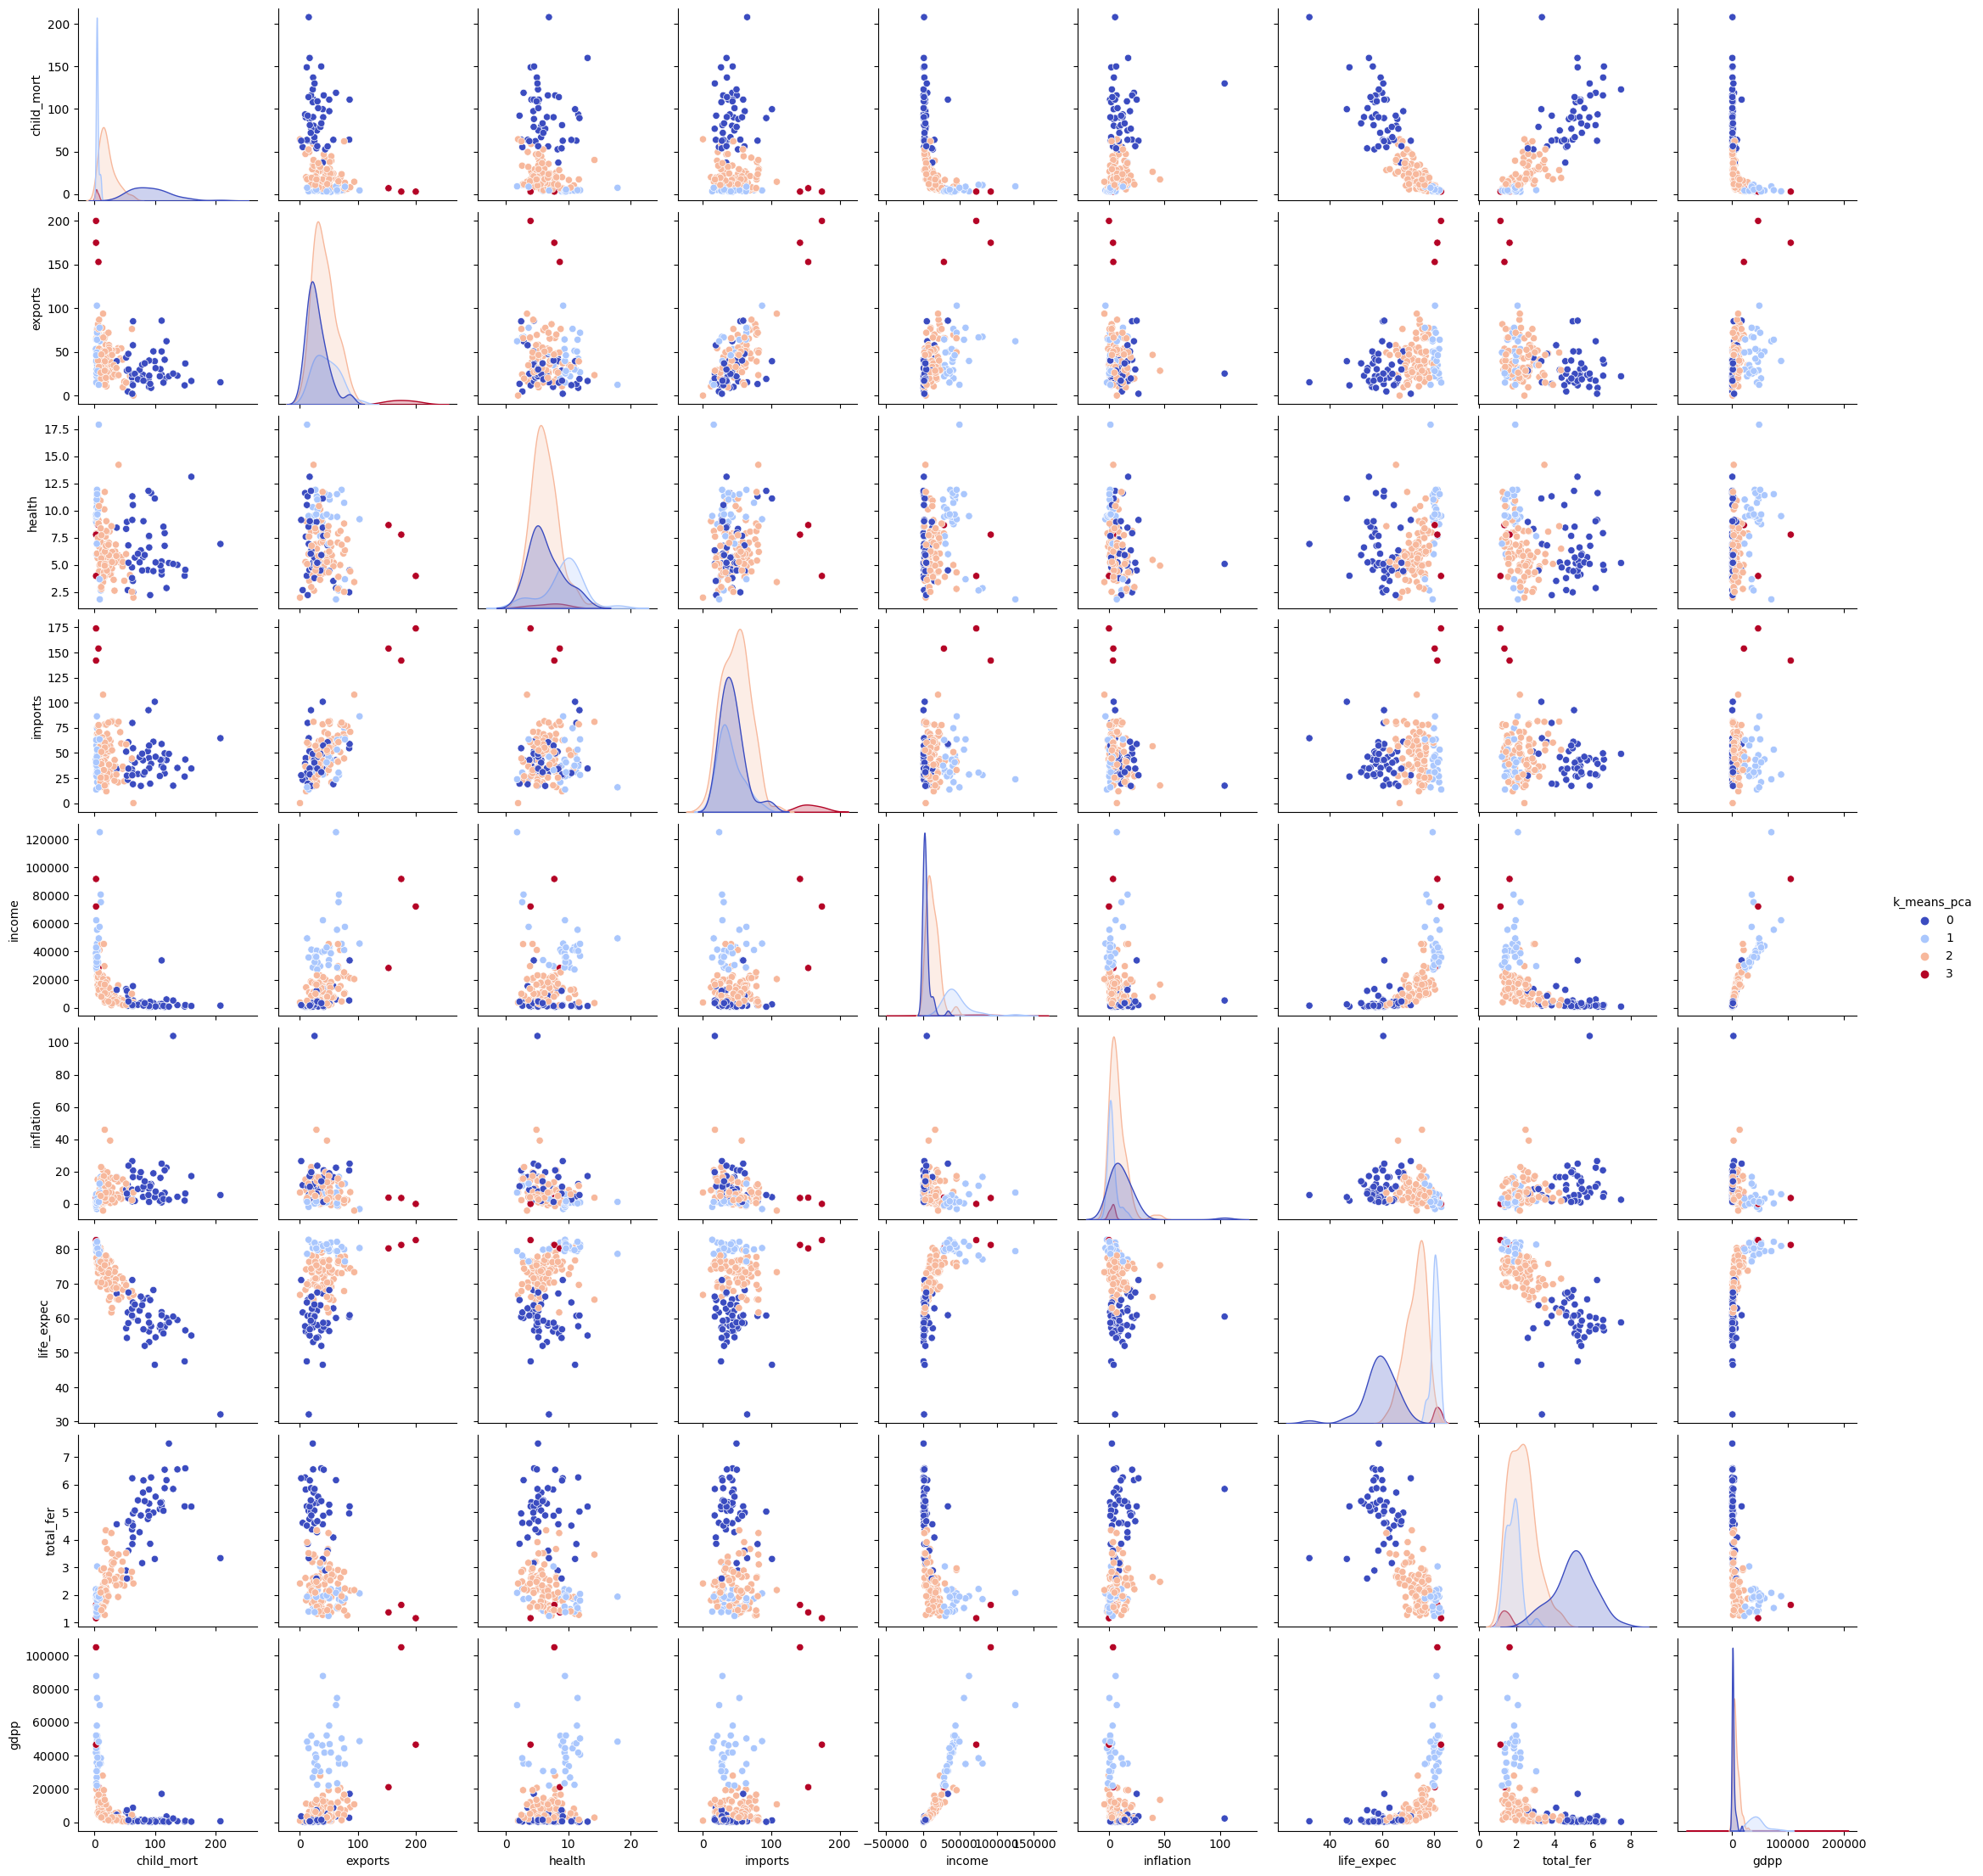

In [210]:
# Graficar
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
    'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

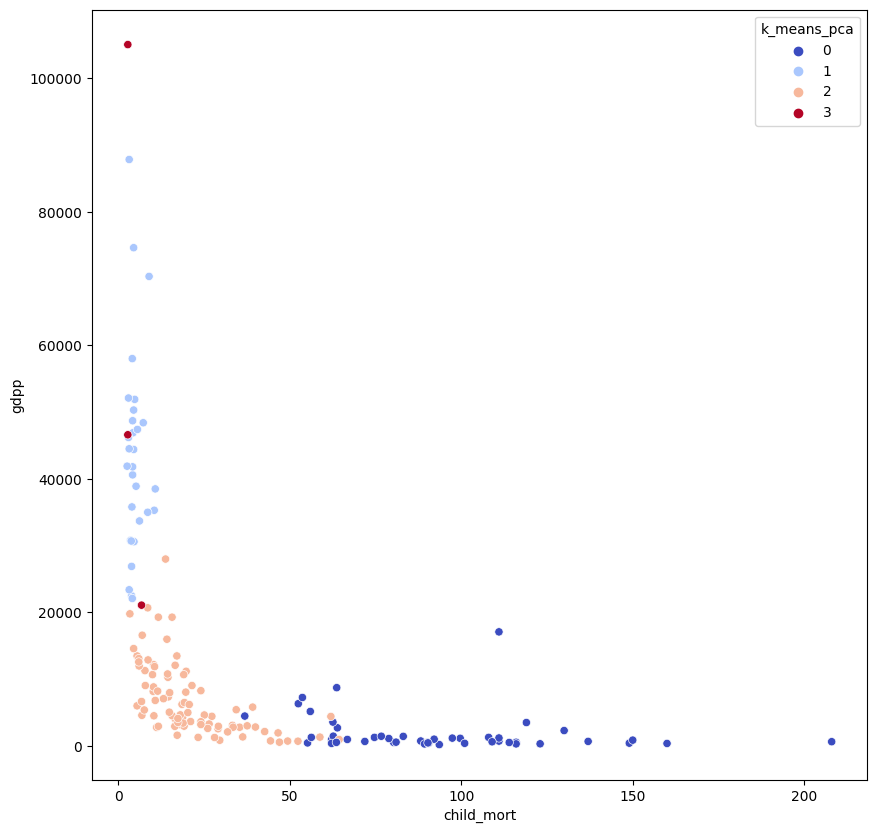

In [211]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')
plt.show()

In [212]:
# seleccionar los registros del dataframe df_country cuyo valor de la columna k_means_pca es igual a 3
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,3,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,3,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,3,0,1,-1,-1


In [213]:
# Graficar mapa interactivo
import pycountry
import plotly.express as px

def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return None

df_map = df_country.copy()
df_map['Code'] = df_country['country'].apply(lambda x: get_alpha_3(x))

fig = px.choropleth(df_map, locations='Code', color='k_means', hover_name='country', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Al relacionar la imagen con la idea que comúnmente se tiene sobre la situación de distintos países, hay bastantes puntos en común, como:

+ Los países anglosajones y Europa occidental con poca necesidad
+ La mayoría de Latinoamérica con necesidad media
+ La mayoría de países africanos con necesidad alta